# Сложные объединения

### Принцип и условия работы Union
✍ Вернёмся к центральному вопросу модуля: как соединить несколько результатов, чтобы получить в выводе один общий?

Чтобы разобраться в этом вопросе, смоделируем ситуацию.

Допустим, мы хотим собрать из справочников по книгам и фильмам один, так чтобы в нём содержались названия произведений, а также их описание — книга или фильм.

Для этого напишем простой запрос:

Запрос\
SELECT \
         book_name object_name, 'книга' object_description \
FROM \
         public.books\
UNION ALL\
SELECT \
         movie_title, 'фильм' \
FROM \
         sql.kinopoisk

Детализация
SELECT book_name object_name, 'книга' object_descritption /*выбираем столбец с названием book_name, задаём алиас для столбца object_name, задаём во второй колонке объект ‘книга’ с алиасом для столбца object_descritption*/\
FROM public.books /*из схемы public и таблицы books*/\
UNION ALL /*оператор присоединения*/\
SELECT movie_title, 'фильм' /*выбираем столбец movie_title, сами задаём во второй колонке объект ‘фильм’*/\
FROM sql.kinopoisk /*из схемы sql и таблицы kinopoisk*/\

Визуально произведённое нами действие можно представить следующим образом:

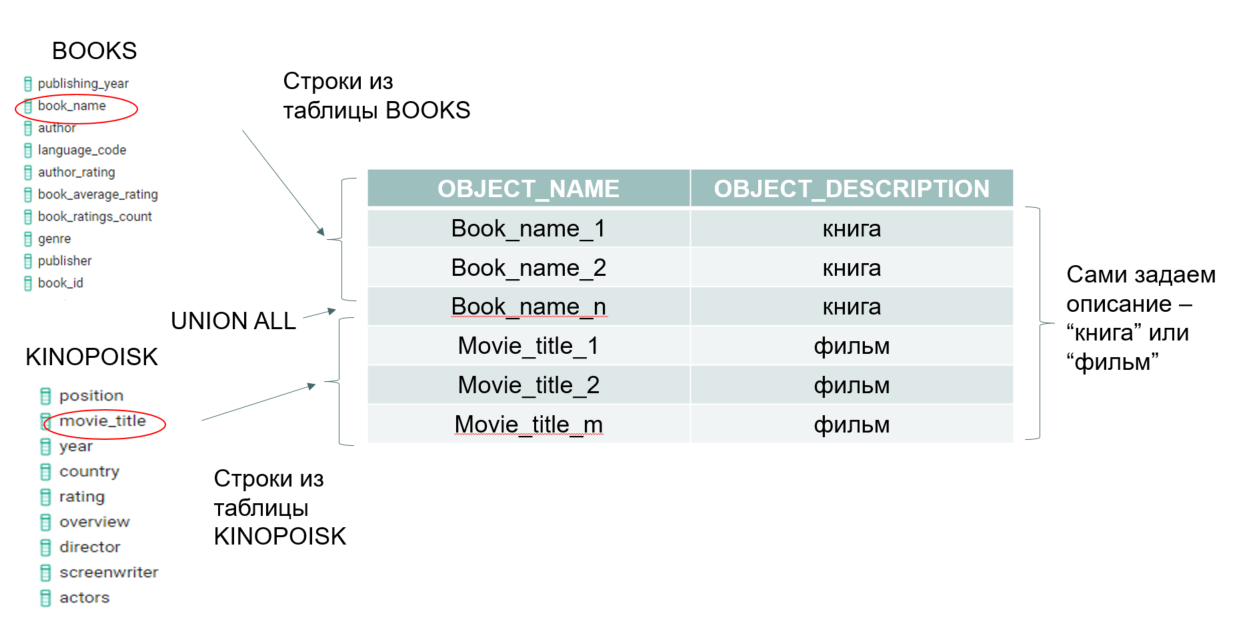

В запросе мы использовали оператор UNION ALL — он присоединяет любой результат запроса к другому «снизу» при условии, что у них одинаковая структура, а именно:
* одинаковый тип данных;

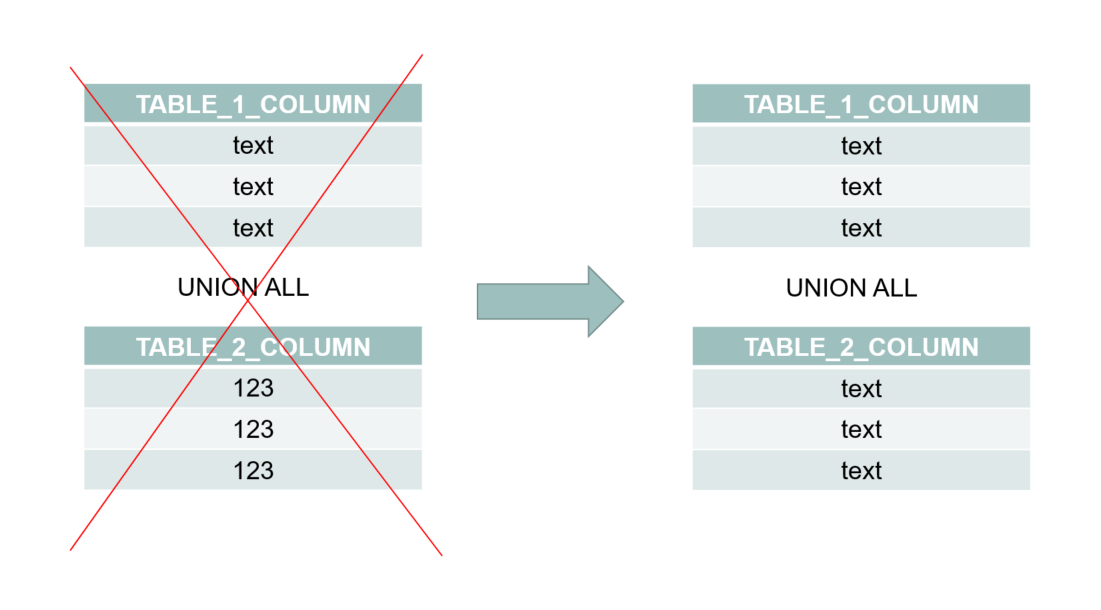

* одинаковое количество столбцов;

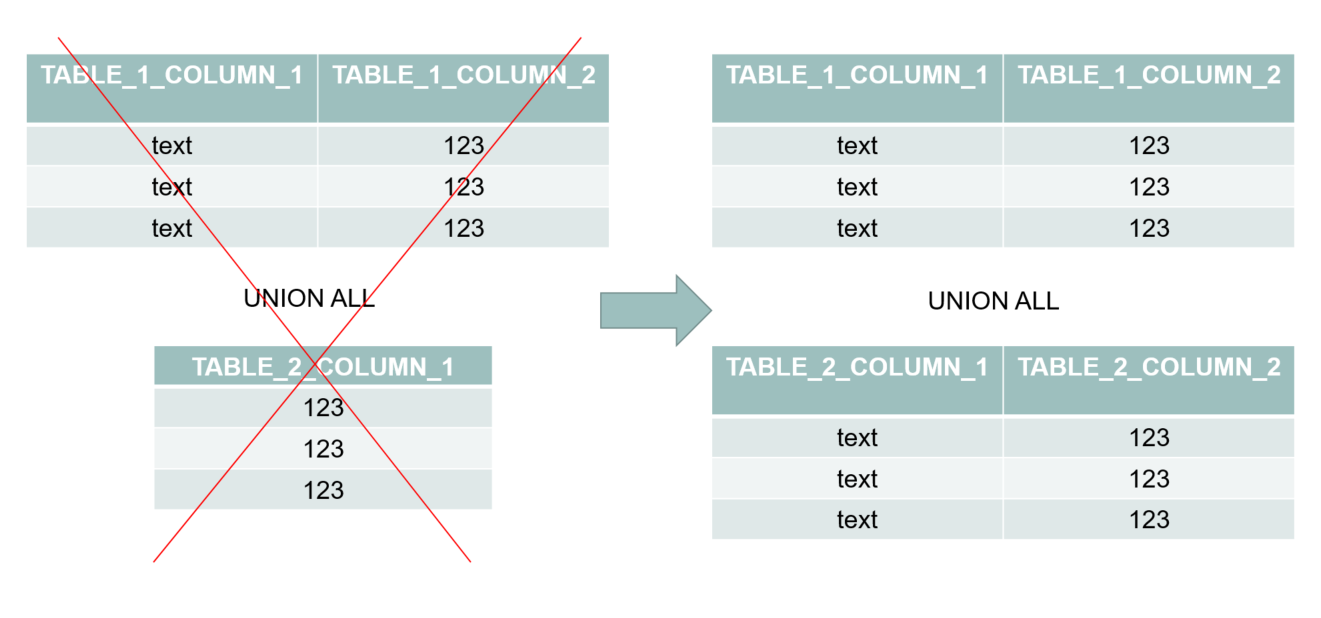

* одинаковый порядок столбцов согласно типу данных.

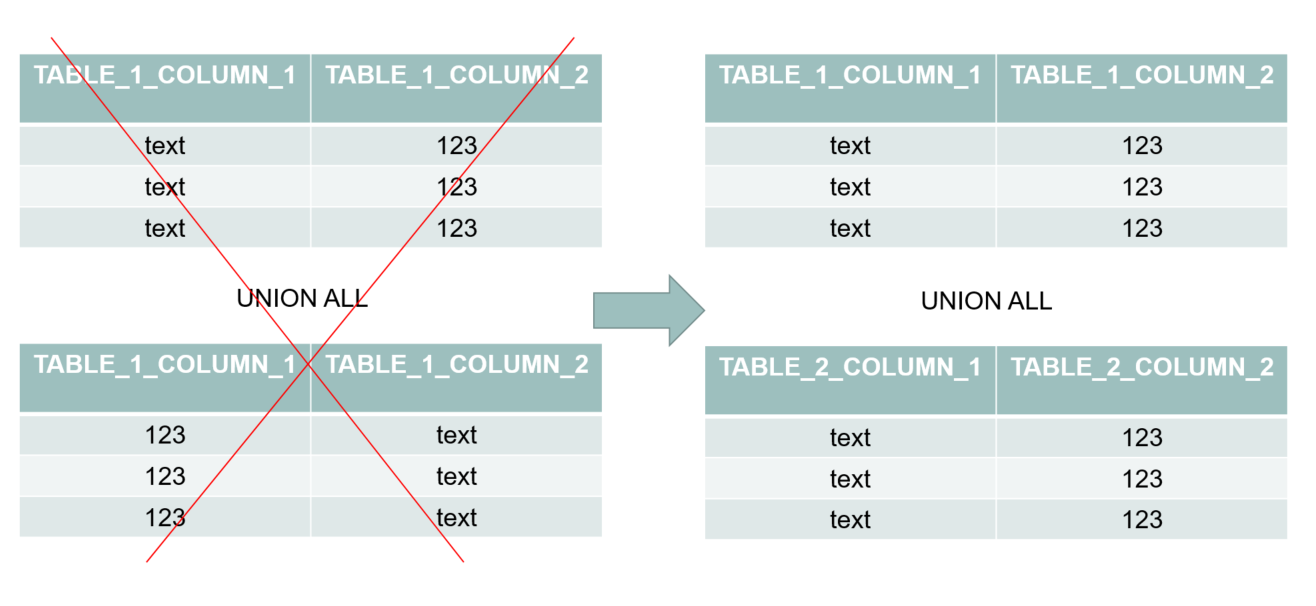



### Виды UNION
Оператор присоединения существует в двух вариантах:

* UNION выводит только уникальные записи;
* UNION ALL присоединяет все строки последующих таблиц к предыдущим, без ограничений по уникальности.

Важно! UNION оставляет только уникальные значения, а потому требует дополнительных вычислительных мощностей и памяти (в данном случае можно провести аналогию с DISTINCT). Поэтому если вы уверены в отсутствии дубликатов в данных или они вам не важны, предпочтительнее использовать UNION ALL.

### Синтаксис
Запрос строится таким образом:

SELECT\
         n columns\
FROM \
         table_1\
UNION ALL\
SELECT \
         n columns\
FROM \
         table_2\
...\
UNION ALL\
SELECT \
         n columns\
FROM \
         table_n

Результатом выполнения такого запроса будут строки table_1, table_2, ..., table_n, соединённые одни под другими и выведенные в единой выдаче.

Важно! Названия итоговых колонок в выводе будут такие же, как в первом блоке SELECT, даже если они отличаются в других блоках подзапросов.
Пришла пора испытать функцию UNION(ALL) на практике.

Обратимся к нашему датасету о транспортной компании и посмотрим, как сформировать справочник с ID всех таблиц и указанием объекта, к которому он относится.

Попробуйте в Metabase!

Запрос
SELECT
         c.city_id object_name, 'id города' object_type
FROM 
         sql.city c

UNION ALL

SELECT
         d.driver_id other_name, 'id водителя' other_type
FROM 
         sql.driver d

UNION ALL

SELECT
         s.ship_id, 'id доставки'
FROM 
         sql.shipment s

UNION ALL

SELECT
         c.cust_id, 'id клиента'
FROM 
         sql.customer c

UNION ALL

SELECT
         t.truck_id, 'id грузовика'
FROM 
         sql.truck t
ORDER BY 1
Детализация
SELECT
         c.city_id object_name,  'id города' object_type /*выбираем колонку city_id и задаём ей алиас object_name, сами задаём объект 'id города' и название столбца object_type*/
FROM 
         sql.city c /*из схемы sql и таблицы city, задаём алиас таблице — с*/

UNION ALL /*оператор присоединения*/

SELECT
         d.driver_id other_name,  'id водителя' other_type /*выбираем колонку driver_id и задаём ей алиас other_name, сами задаём объект 'id водителя' и название столбца other_type*/
FROM 
         sql.driver d  /*из схемы sql и таблицы driver, задаём алиас таблице — d*/

UNION ALL /*оператор присоединения*/

SELECT
         s.ship_id,  'id доставки' /*выбираем колонку ship_id, сами задаём объект 'id доставки'*/
FROM 
         sql.shipment s /*из схемы sql и таблицы shipment, задаём алиас таблице — s*/

UNION ALL /*оператор присоединения*/

SELECT
         c.cust_id,  'id клиента' /*выбираем колонку cust_id, сами задаём объект 'id клиента'*/
FROM 
         sql.customer c /*из схемы sql и таблицы customer, задаём алиас таблице — c*/

UNION ALL /*оператор присоединения*/

SELECT
         t.truck_id,  'id грузовика' /*выбираем колонку truck_id, сами задаём объект 'id грузовика'*/
FROM 
         sql.truck t /*из схемы sql и таблицы truck, задаём алиас таблице — t*/
ORDER BY 1 /*сортировка по первому столбцу*/
Обратите внимание! Несмотря на исходные названия колонок other_name и other_type во втором подзапросе, в выводе мы получим названия, которые дали в первом блоке: object_name и object_type.

Другая особенность — в применении сортировки ORDER BY: она всегда будет относиться к итоговому результату всего запроса с UNION ALL.

В случаях, когда необходимо применить команду ORDER BY или LIMIT не к итоговому результату, а к каждой части запроса, можно обернуть подзапросы в скобки.

Чтобы посмотреть, как это работает, вернёмся к нашему примеру с общим справочником по фильмам и книгам.

Мы уже знаем, что можно легко и непринуждённо применить операторы ORDER BY и LIMIT ко всему результату запроса.

SELECT book_name object_name, 'книга' object_descritption \
FROM public.books\
UNION ALL\
SELECT movie_title, 'фильм' \
FROM sql.kinopoisk\
ORDER BY 1\
LIMIT 1

Всё бы хорошо, только в таком случае отсортирован будет весь общий справочник, а в выводе останется одна строка с названием объекта, идущим первым по алфавиту.

А если мы не хотим общую сортировку? Может, нам нужны строки с названием как фильма, так и книги, идущих первыми по алфавиту.

Нет ничего проще — отсортируем каждую часть запроса по отдельности и объединим результаты!


Просто добавим ORDER BY и LIMIT ещё и в первую часть запроса:

SELECT book_name object_name, 'книга' object_descritption \
FROM public.books\
ORDER BY 1\
LIMIT 1\
UNION ALL\
SELECT movie_title, 'фильм' \
FROM sql.kinopoisk\
ORDER BY 1\
LIMIT 1

Вместо результата получим сообщение о синтаксической ошибке: "...syntax error at or near "UNION"..." Очевидно, этот фокус не удался.

Не стоит огорчаться, ведь проблему можно решить одним (ну, почти) движением руки — просто добавив скобки вокруг каждой из частей запроса.


(SELECT book_name object_name, 'книга' object_descritption \
FROM public.books\
ORDER BY 1\
LIMIT 1)\
UNION ALL\
(SELECT movie_title, 'фильм' \
FROM sql.kinopoisk\
ORDER BY 1\
LIMIT 1)

Отлично! Мы получили именно то, что хотели.

### Почему так важен тип данных?
Как мы уже знаем, UNION может быть использован только в случае полного соответствия столбцов и их типов в объединяемых запросах.

Допустим, мы хотим вывести список всех id городов и их названий в одном столбце.


Давайте напишем запрос, который позволит получить нужный нам результат.

Запрос\
SELECT \
         c.city_id\
FROM\
         sql.city c\
UNION ALL\
SELECT \
         cc.city_name\
FROM\
         sql.city cc\
        
Детализация\
SELECT \
         c.city_id /*выбираем столбец city_id*/\
FROM\
         sql.city c /*из схемы sql  и таблицы city, задаём таблице алиас с*/ \
UNION ALL /*оператор присоединения*/\
SELECT \
         cc.city_name /*выбираем столбец city_name*/\
FROM\
         sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас сс*/

Вместо результата вы получите сообщение об ошибке: "ERROR: UNION types integer and text cannot be matched". Дело в том, что мы попытались объединить числовой и строковый типы в одной колонке, а это невозможно.

Если мы всё же хотим выполнить поставленную задачу, придётся привести оба столбца к одному типу данных. Не каждый текст может быть приведён к числу, зато каждое число может быть представлено в текстовом формате.

Забегая вперёд, скажем пару слов о типизации столбцов. Для типизации в Postgres составляется запрос по модели column_name::column_type.

Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.

Важно! Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста отличается от сортировки чисел и дат.

Немного подправим запрос, чтобы получить желаемый результат.


Запрос\
SELECT \
         c.city_id::text\
FROM\
         sql.city c\
UNION ALL\
SELECT \
         cc.city_name\
FROM\
         sql.city cc\

Детализация\
SELECT \
         c.city_id::text /*выбираем столбец city_id, переводим city_id из числового в текстовый формат*/\
FROM\
         sql.city c /*из схемы sql  и таблицы city, задаём таблице алиас с*/\
UNION ALL /*оператор присоединения*/\
SELECT \
         cc.city_name /*выбираем столбец city_name*/\
FROM\
         sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас сс*/\

### Возможности UNION
✍ Помимо соединения разнородных сущностей в единый справочник, UNION ALL часто используется для подведения промежуточных итогов и выведения результатов агрегатных функций.

Кроме агрегатных функций, в запросах с UNION могут использоваться функции группировки и выборки.


Попробуем вывести обобщённые данные о населении по всем городам, с детализацией до конкретного города.


Запрос\
SELECT\
         c.city_name,\
         c.population\
FROM\
         sql.city c\
UNION ALL\
SELECT\
         'total',\
         SUM(c.population)\
FROM\
         sql.city c\
ORDER BY 2 DESC

Детализация\
SELECT\
         c.city_name,\
         c.population /*выбираем столбцы city_name, population*/\
FROM\
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/\
UNION ALL /*оператор присоединения*/\
SELECT\
         'total',\
         SUM(c.population) /*сами задаём объект ‘total’, суммируем все значения столбца population*/\
FROM\
         sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/\
ORDER BY 2 DESC /*сортируем по второму столбцу в убывающем порядке (чтобы итоговая сумма была в начале)*/

Визуально это действие можно представить так:

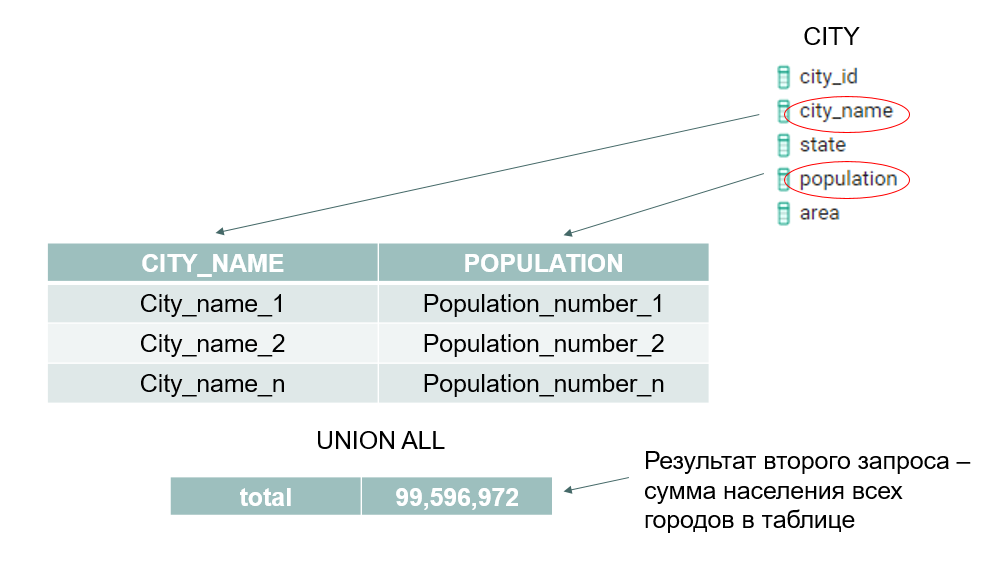

Выполнив запрос в Metabase, вы заметите, что сначала выведен итоговый результат с суммой населения всех городов в таблице, а затем по каждому городу в отдельности.